In [86]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from ultralytics import YOLO

## 0. Functions

In [87]:
def convert_from_yolo_to_cv2(input_txt, width=28*5, height=28):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]    
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(width))
        temp[2] = round(float(temp[2])*(height))
        temp[3] = round(float(temp[3])*(width))
        temp[4] = round(float(temp[4])*(height))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [88]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample),
                                   pt1=(i[1],i[4]),
                                   pt2=(i[2],i[3]),
                                   color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
    
    print(sorted([(i[1], i[0]) for i in ann_sample]))
    
    return img_sample

## Performance on unseen data

In [130]:
perturbed_img_path = 'data/google_digit_data/test_cropped_32_pgd_10_0.1/images'
original_img_path = 'data/google_digit_data/test_cropped_32/images'

In [131]:
model=YOLO('./model_results/model_google_data_32/best.pt')

In [132]:
data = os.listdir(f'./{perturbed_img_path}')
random.shuffle(data)
data = data[:20]
data

['perturb_7158.png',
 'perturb_7066.png',
 'perturb_6739.png',
 'perturb_6886.png',
 'perturb_18261.png',
 'perturb_7199.png',
 'perturb_25899.png',
 'perturb_7061.png',
 'perturb_14592.png',
 'perturb_6947.png',
 'perturb_6637.png',
 'perturb_24520.png',
 'perturb_26326.png',
 'perturb_13533.png',
 'perturb_32361.png',
 'perturb_6639.png',
 'perturb_6677.png',
 'perturb_18040.png',
 'perturb_6985.png',
 'perturb_27759.png']

In [133]:
for img in data:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_pgd_10_0.1/images/perturb_7158.png: 32x32 1 2, 8.5ms
Speed: 0.3ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict54
1 label saved to /home/gj2353/ultralytics/runs/detect/predict54/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_pgd_10_0.1/images/perturb_7066.png: 32x32 1 3, 1 8, 11.6ms
Speed: 0.4ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict54
2 labels saved to /home/gj2353/ultralytics/runs/detect/predict54/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32_pgd_10_0.1/images/perturb_6739.png: 32x32 1 8, 9.9ms
Speed: 0.3ms preprocess, 9.9ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2

In [134]:
pred_folder='predict54'

In [135]:
preds_perturb = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_perturb = [i for i in preds_perturb if 'perturb' in i]
preds_perturb = sorted(preds_perturb)
preds_perturb

['perturb_13533.txt',
 'perturb_14592.txt',
 'perturb_18261.txt',
 'perturb_25899.txt',
 'perturb_32361.txt',
 'perturb_6739.txt',
 'perturb_6985.txt',
 'perturb_7066.txt',
 'perturb_7158.txt',
 'perturb_7199.txt']

In [136]:
org_data = [i.replace('perturb_','') for i in data]
org_data

['7158.png',
 '7066.png',
 '6739.png',
 '6886.png',
 '18261.png',
 '7199.png',
 '25899.png',
 '7061.png',
 '14592.png',
 '6947.png',
 '6637.png',
 '24520.png',
 '26326.png',
 '13533.png',
 '32361.png',
 '6639.png',
 '6677.png',
 '18040.png',
 '6985.png',
 '27759.png']

In [137]:
for img in org_data:
    model.predict(f'./{original_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7158.png: 32x32 1 2, 9.4ms
Speed: 0.4ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict54
11 labels saved to /home/gj2353/ultralytics/runs/detect/predict54/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/7066.png: 32x32 1 3, 1 8, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict54
12 labels saved to /home/gj2353/ultralytics/runs/detect/predict54/labels

image 1/1 /home/gj2353/e6998-5_final_project/data/google_digit_data/test_cropped_32/images/6739.png: 32x32 2 2s, 1 8, 8.3ms
Speed: 0.2ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict54
13 labels sa

In [138]:
preds_org = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_org = [i for i in preds_org if 'perturb' not in i]
preds_org = sorted(preds_org)
preds_org

['14592.txt',
 '18261.txt',
 '25899.txt',
 '26326.txt',
 '27759.txt',
 '32361.txt',
 '6637.txt',
 '6677.txt',
 '6739.txt',
 '6886.txt',
 '6947.txt',
 '6985.txt',
 '7066.txt',
 '7158.txt',
 '7199.txt']

In [139]:
org_list=[]
org_ann_list = []

perturbed_list=[]
perturbed_ann_list = []

for pred in preds_org:
    ## save original img and label
    org_pred = pred.split('.')[0]+'.txt'
    org_img = pred.split('.')[0] + '.png'
    org_list.append(np.array(Image.open(f'./{original_img_path}/{org_img}')))

    try:
        with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
            sample_annotation = f.read()
            org_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
            f.close()        
    except:
        org_ann_list.append([])


    ## save perturbed img and label
    
    perturb_pred = 'perturb_' + pred.split('.')[0]+'.txt'
    perturb_img = 'perturb_' + pred.split('.')[0] + '.png'
    perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{perturb_img}')))
    
    try:
        with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{perturb_pred}', "r") as f:
            sample_annotation = f.read()
            perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
    except:
        perturbed_ann_list.append([])


0.8997395833333334


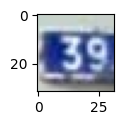

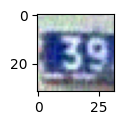

In [140]:
# Check the first image

plt.subplots(figsize=(1,1))
plt.imshow(org_list[0])

plt.subplots(figsize=(1,1))
plt.imshow(perturbed_list[0])

print(np.sum(org_list[0]!=perturbed_list[0])/np.sum(org_list[0]==org_list[0]))

% difference :  0.8997395833333334
[(8, '3'), (8, '5'), (19, '9')]
[(9, '5'), (20, '9')]


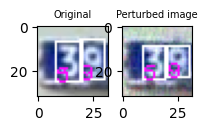

% difference :  0.9127604166666666
[(4, '1'), (11, '3'), (11, '5'), (21, '1')]
[(4, '1'), (21, '1')]


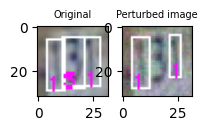

% difference :  0.7705078125
[(4, '9'), (15, '1')]
[(7, '4')]


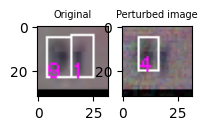

% difference :  0.8089192708333334
[(26, '1')]
[]


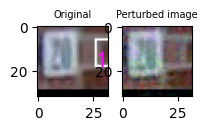

% difference :  0.9563802083333334
[(5, '3'), (6, '5'), (15, '1')]
[]


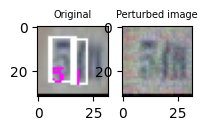

% difference :  0.7639973958333334
[(5, '9')]
[(9, '3'), (11, '3')]


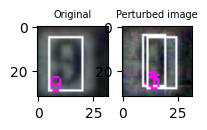

% difference :  0.7786458333333334
[(4, '2')]
[]


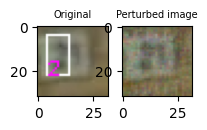

% difference :  0.7880859375
[(4, '6'), (16, '6')]
[]


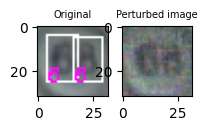

% difference :  0.8141276041666666
[(2, '1'), (4, '1'), (11, '7')]
[(11, '7')]


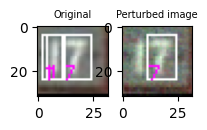

% difference :  0.767578125
[(6, '1'), (13, '9')]
[]


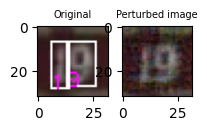

% difference :  0.7724609375
[(9, '2'), (20, '1')]
[]


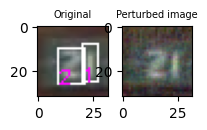

% difference :  0.7994791666666666
[(5, '2'), (15, '1')]
[(15, '1')]


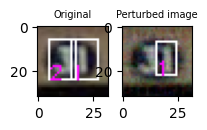

% difference :  0.8118489583333334
[(4, '2'), (16, '7')]
[(7, '2'), (16, '7')]


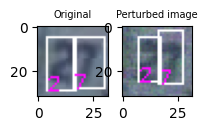

% difference :  0.7594401041666666
[(4, '1')]
[(10, '1')]


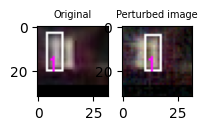

% difference :  0.9733072916666666
[(5, '2'), (19, '1'), (19, '7')]
[(5, '2'), (18, '7')]


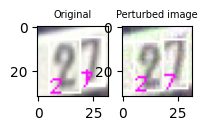

In [141]:
# Check the originval vs. Perturbation predictions

for i in range(len(org_list)):
    figs, axs= plt.subplots(nrows=1, ncols=2, figsize=(2,4))
    print("% difference : ", np.sum(perturbed_list[i]!=org_list[i])/np.sum(org_list[i]==org_list[i]))    
    img_temp = get_img_with_boxes(org_list[i], org_ann_list[i])
    axs[0].imshow(img_temp)
    axs[0].set_title("Original", fontsize=7)
    
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    axs[1].imshow(img_temp)
    axs[1].set_title("Perturbed image", fontsize=7)
    plt.show()

In [257]:
perturbed_img_path = "GANs_training/GANs_training_google10/image_samples"

In [236]:
model=YOLO('./model_results/model_google_data_32/best.pt')

In [259]:
data = os.listdir(f'./{perturbed_img_path}/')
data_perturbed = sorted([i for i in data if 'perturbed' in i])
data_org = sorted([i for i in data if 'original' in i])

In [238]:
display(data_perturbed)
display(data_org)

['perturbed_0.png',
 'perturbed_1.png',
 'perturbed_2.png',
 'perturbed_3.png',
 'perturbed_4.png',
 'perturbed_5.png',
 'perturbed_6.png',
 'perturbed_7.png',
 'perturbed_8.png',
 'perturbed_9.png']

['original_0.png',
 'original_1.png',
 'original_2.png',
 'original_3.png',
 'original_4.png',
 'original_5.png',
 'original_6.png',
 'original_7.png',
 'original_8.png',
 'original_9.png']

In [239]:
for img in data_perturbed:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/perturbed_0.png: 32x32 (no detections), 9.5ms
Speed: 0.3ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict37
0 label saved to /home/gj2353/ultralytics/runs/detect/predict37/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/perturbed_1.png: 32x32 (no detections), 10.0ms
Speed: 0.3ms preprocess, 10.0ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict37
0 label saved to /home/gj2353/ultralytics/runs/detect/predict37/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/perturbed_2.png: 32x32 (no detections), 8.9ms
Speed: 0.2ms preprocess, 8.9ms inference, 0.5ms postprocess per image at shape (1, 3, 32, 32)
Results saved to 

In [247]:
pred_folder='predict37'
# read where the file saves to.
# Also, make sure to restart the kernel if you added new images and
# you want those predictions to be saved to a different pred folder

In [241]:
preds_perturb = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
# preds_perturb = sorted(preds_perturb)
preds_perturb = [i for i in preds_perturb if 'perturbed' in i]
preds_perturb

[]

In [242]:
for img in data_org:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/original_0.png: 32x32 2 1s, 1 4, 9.3ms
Speed: 0.4ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict37
1 label saved to /home/gj2353/ultralytics/runs/detect/predict37/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/original_1.png: 32x32 2 6s, 8.8ms
Speed: 0.2ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict37
2 labels saved to /home/gj2353/ultralytics/runs/detect/predict37/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google11/image_samples/original_2.png: 32x32 1 6, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/det

In [243]:
preds_org = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_org = sorted([i for i in preds_org if 'orig' in i])
preds_org

['original_0.txt',
 'original_1.txt',
 'original_2.txt',
 'original_3.txt',
 'original_4.txt',
 'original_5.txt',
 'original_6.txt',
 'original_7.txt',
 'original_8.txt',
 'original_9.txt']

In [228]:
# org_list=[]
# org_ann_list = []

# for pred in preds_org:
#     img = pred.split('.')[0]+'.png'
#     org_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
#     with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
#         sample_annotation = f.read()
#         org_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
#         f.close()

# perturbed_list=[]
# perturbed_ann_list = []

# for pred in preds_perturb:
#     img = pred.split('.')[0]+'.png'
#     perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
#     with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
#         sample_annotation = f.read()
#         perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
#         f.close()


In [250]:
org_list=[]
org_ann_list = []

for pred1 in data_org:
    pred = pred1.split('.')[0]+'.txt'
    img = pred1
    org_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))

    try:
        with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
            sample_annotation = f.read()
            org_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
            f.close()        
#         with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
#             sample_annotation = f.read()
#             perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
    except:
        org_ann_list.append([])
    

perturbed_list=[]
perturbed_ann_list = []

for pred1 in data_perturbed:
    pred = pred1.split('.')[0]+'.txt'
    img = pred1
    perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
    try:
        with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
            sample_annotation = f.read()
            perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
    except:
        perturbed_ann_list.append([])


0.8805338541666666


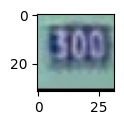

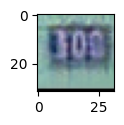

In [251]:
# Check the first image

plt.subplots(figsize=(1,1))
plt.imshow(org_list[0])

plt.subplots(figsize=(1,1))
plt.imshow(perturbed_list[0])

print(np.sum(org_list[0]!=perturbed_list[0])/np.sum(org_list[0]==org_list[0]))

% difference :  0.8805338541666666
[(4, '3'), (13, '0'), (22, '0')]
[]


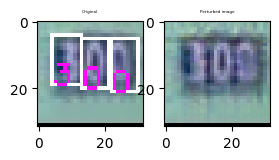

% difference :  0.8929036458333334
[(4, '5'), (14, '5')]
[]


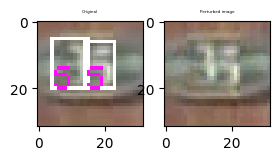

% difference :  0.8528645833333334
[(2, '5')]
[]


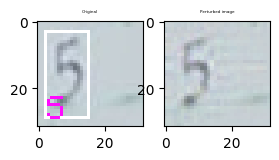

% difference :  0.8922526041666666
[(7, '2'), (16, '9')]
[]


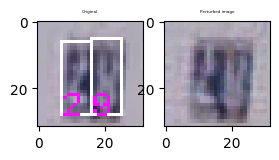

% difference :  0.892578125
[(6, '6'), (6, '8'), (19, '5')]
[]


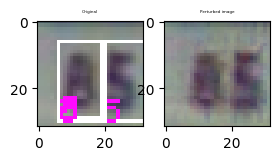

% difference :  0.8170572916666666
[]
[]


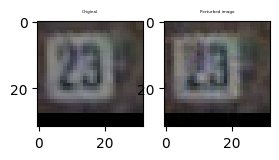

% difference :  0.8245442708333334
[(0, '1'), (4, '2')]
[]


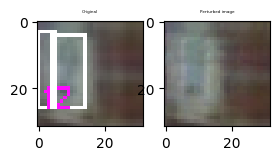

% difference :  0.84765625
[(5, '1'), (11, '5')]
[]


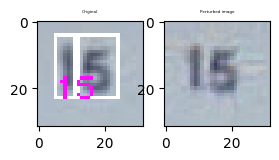

% difference :  0.8942057291666666
[(6, '8'), (18, '1')]
[]


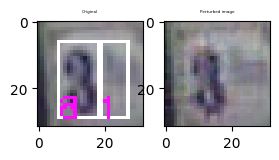

% difference :  0.8388671875
[(3, '4'), (14, '1')]
[]


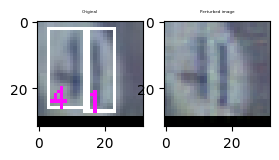

In [255]:
# Check the originval vs. Perturbation predictions

for i in range(len(org_list)):
    figs, axs= plt.subplots(nrows=1, ncols=2, figsize=(3,6))
    print("% difference : ", np.sum(perturbed_list[i]!=org_list[i])/np.sum(org_list[i]==org_list[i]))    
    img_temp = get_img_with_boxes(org_list[i], org_ann_list[i])
    axs[0].imshow(img_temp)
    axs[0].set_title("Original", fontsize=3)
    
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    axs[1].imshow(img_temp)
    axs[1].set_title("Perturbed image", fontsize=3)
    plt.show()